# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
f = "merged_HG00615_HG00672.csv"

In [3]:
df = pd.read_csv(f, sep='\t', header=None)
df = df.astype(str)

df

,0,1,2,3,4
0,chr1,1530547,"0/0:99:3:71:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...
1,chr1,2994984,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776..."
2,chr1,4095099,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144..."
3,chr1,4211149,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177..."
4,chr1,6669214,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665..."
...,...,...,...,...,...
1832,chrX,139302751,"0/1:1:1:11:1:1:1:1:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488..."
1833,chrX,139859819,"0/0:99:1:119:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9..."
1834,chrX,144761767,"0/0:99:1:94:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9..."
1835,chrX,146248394,"0/0:99:1:124:0:999:0:999:PE,SR",0/1:99:2:115:0:999:1:314:SR,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...


In [4]:
df_sub = df[4].str.split(' ', expand=True)
df_sub

,0,1,2,3,4,5,6,7,8
0,0/1:1:2:75:0:27:1:1:SR,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,"1/1:99:0:112:1:1:2:596:RD,PE,SR",chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,"0/0:99:2:44:0:999:0:999:RD,PE,SR",chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,"0/0:99:2:16:0:999:0:999:RD,PE,SR",chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,"0/0:99:2:130:0:999:0:999:RD,PE,SR",chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...
1832,"0/1:99:2:1:1:1:1:746:PE,SR",chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,"0/1:99:1:84:1:1:1:796:RD,PE,SR",chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,"0/1:99:1:84:1:1:1:746:RD,PE,SR",chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,1/1:99:1:1:0:27:2:646:SR,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [5]:
df_res = pd.concat([df, df_sub], axis=1)
df_res

,0,1,2,3,4,0,1,2,3,4,5,6,7,8
0,chr1,1530547,"0/0:99:3:71:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...,0/1:1:2:75:0:27:1:1:SR,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,chr1,2994984,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776...","1/1:99:0:112:1:1:2:596:RD,PE,SR",chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,chr1,4095099,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144...","0/0:99:2:44:0:999:0:999:RD,PE,SR",chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,chr1,4211149,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177...","0/0:99:2:16:0:999:0:999:RD,PE,SR",chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,chr1,6669214,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665...","0/0:99:2:130:0:999:0:999:RD,PE,SR",chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,"0/1:1:1:11:1:1:1:1:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488...","0/1:99:2:1:1:1:1:746:PE,SR",chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,chrX,139859819,"0/0:99:1:119:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9...","0/1:99:1:84:1:1:1:796:RD,PE,SR",chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,chrX,144761767,"0/0:99:1:94:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9...","0/1:99:1:84:1:1:1:746:RD,PE,SR",chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,chrX,146248394,"0/0:99:1:124:0:999:0:999:PE,SR",0/1:99:2:115:0:999:1:314:SR,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...,1/1:99:1:1:0:27:2:646:SR,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [6]:
# locus = dir_name
df_res.columns = ["locus", "position","genotype129", "genotype615", "junk" , "genotype672","pos_615", "f2_count_REF_615", "f2_count_ALT_615", "f2_count_615", "pos_672", "f2_count_REF_672", "f2_count_ALT_672", "f2_count_672"]
df_res

,locus,position,genotype129,genotype615,junk,genotype672,pos_615,f2_count_REF_615,f2_count_ALT_615,f2_count_615,pos_672,f2_count_REF_672,f2_count_ALT_672,f2_count_672
0,chr1,1530547,"0/0:99:3:71:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...,0/1:1:2:75:0:27:1:1:SR,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,chr1,2994984,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776...","1/1:99:0:112:1:1:2:596:RD,PE,SR",chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,chr1,4095099,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144...","0/0:99:2:44:0:999:0:999:RD,PE,SR",chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,chr1,4211149,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177...","0/0:99:2:16:0:999:0:999:RD,PE,SR",chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,chr1,6669214,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665...","0/0:99:2:130:0:999:0:999:RD,PE,SR",chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,"0/1:1:1:11:1:1:1:1:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488...","0/1:99:2:1:1:1:1:746:PE,SR",chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,chrX,139859819,"0/0:99:1:119:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9...","0/1:99:1:84:1:1:1:796:RD,PE,SR",chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,chrX,144761767,"0/0:99:1:94:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9...","0/1:99:1:84:1:1:1:746:RD,PE,SR",chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,chrX,146248394,"0/0:99:1:124:0:999:0:999:PE,SR",0/1:99:2:115:0:999:1:314:SR,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...,1/1:99:1:1:0:27:2:646:SR,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [7]:
df_res["locus"] = df_res["locus"] + ":" + df_res["position"]
df_res

,locus,position,genotype129,genotype615,junk,genotype672,pos_615,f2_count_REF_615,f2_count_ALT_615,f2_count_615,pos_672,f2_count_REF_672,f2_count_ALT_672,f2_count_672
0,chr1:1530547,1530547,"0/0:99:3:71:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...,0/1:1:2:75:0:27:1:1:SR,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,chr1:2994984,2994984,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776...","1/1:99:0:112:1:1:2:596:RD,PE,SR",chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,chr1:4095099,4095099,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144...","0/0:99:2:44:0:999:0:999:RD,PE,SR",chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,chr1:4211149,4211149,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177...","0/0:99:2:16:0:999:0:999:RD,PE,SR",chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,chr1:6669214,6669214,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665...","0/0:99:2:130:0:999:0:999:RD,PE,SR",chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX:139302751,139302751,"0/1:1:1:11:1:1:1:1:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488...","0/1:99:2:1:1:1:1:746:PE,SR",chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,chrX:139859819,139859819,"0/0:99:1:119:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9...","0/1:99:1:84:1:1:1:796:RD,PE,SR",chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,chrX:144761767,144761767,"0/0:99:1:94:0:999:0:999:PE,SR","0/0:99:2:142:0:999:0:999:RD,PE,SR","0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9...","0/1:99:1:84:1:1:1:746:RD,PE,SR",chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,chrX:146248394,146248394,"0/0:99:1:124:0:999:0:999:PE,SR",0/1:99:2:115:0:999:1:314:SR,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...,1/1:99:1:1:0:27:2:646:SR,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [8]:
for index, row in df_res.iterrows():
    row["genotype129"] = row["genotype129"].split(':')[0]
    row["genotype615"] = row["genotype615"].split(':')[0]
    row["genotype672"] = row["genotype672"].split(':')[0]
df_res

,locus,position,genotype129,genotype615,junk,genotype672,pos_615,f2_count_REF_615,f2_count_ALT_615,f2_count_615,pos_672,f2_count_REF_672,f2_count_ALT_672,f2_count_672
0,chr1:1530547,1530547,0/0,0/1,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...,0/1,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,chr1:2994984,2994984,0/0,0/0,"1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776...",1/1,chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,chr1:4095099,4095099,0/0,0/1,"0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144...",0/0,chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,chr1:4211149,4211149,0/0,0/0,"0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177...",0/0,chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,chr1:6669214,6669214,0/0,0/0,"0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665...",0/0,chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX:139302751,139302751,0/1,1/1,"0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488...",0/1,chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,chrX:139859819,139859819,0/0,0/0,"0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9...",0/1,chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,chrX:144761767,144761767,0/0,0/0,"0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9...",0/1,chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,chrX:146248394,146248394,0/0,0/1,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...,1/1,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [9]:
dict_type_convert = {"f2_count_REF_615": int, "f2_count_REF_615": int, "f2_count_REF_615": int, 
                    "f2_count_REF_672": int, "f2_count_REF_672": int, "f2_count_REF_672": int}
df_res = df_res.astype(dict_type_convert)
df_res

,locus,position,genotype129,genotype615,junk,genotype672,pos_615,f2_count_REF_615,f2_count_ALT_615,f2_count_615,pos_672,f2_count_REF_672,f2_count_ALT_672,f2_count_672
0,chr1:1530547,1530547,0/0,0/1,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...,0/1,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,chr1:2994984,2994984,0/0,0/0,"1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776...",1/1,chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,chr1:4095099,4095099,0/0,0/1,"0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144...",0/0,chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,chr1:4211149,4211149,0/0,0/0,"0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177...",0/0,chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,chr1:6669214,6669214,0/0,0/0,"0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665...",0/0,chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX:139302751,139302751,0/1,1/1,"0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488...",0/1,chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,chrX:139859819,139859819,0/0,0/0,"0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9...",0/1,chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,chrX:144761767,144761767,0/0,0/0,"0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9...",0/1,chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,chrX:146248394,146248394,0/0,0/1,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...,1/1,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [10]:
df_res.groupby(by="genotype615")["f2_count_REF_615"].mean()

genotype615
./.    98.000000
0/0    99.033333
0/1    93.996124
1/1    97.726619
Name: f2_count_REF_615, dtype: float64

In [11]:
df_res["genotype615"] = df_res["genotype615"].map({"0/0":0,
                             "0/1":1,
                             "1/1":2,
                             "./.":3,
                             np.nan:4},
                             na_action=None)
df_res["genotype672"] = df_res["genotype672"].map({"0/0":0,
                             "0/1":1,
                             "1/1":2,
                             "./.":3,
                             np.nan:4},
                             na_action=None)
df_res

,locus,position,genotype129,genotype615,junk,genotype672,pos_615,f2_count_REF_615,f2_count_ALT_615,f2_count_615,pos_672,f2_count_REF_672,f2_count_ALT_672,f2_count_672
0,chr1:1530547,1530547,0/0,1,0/1:1:2:75:0:27:1:1:SR chr10:102885491-1028858...,1,chr10:102885491-102885839/,98,50,148,chr10:102885491-102885839/,24,84,108
1,chr1:2994984,2994984,0/0,0,"1/1:99:0:112:1:1:2:596:RD,PE,SR chr10:10333776...",2,chr10:103337767-103338096/,180,24,204,chr10:103337767-103338096/,106,50,156
2,chr1:4095099,4095099,0/0,1,"0/0:99:2:44:0:999:0:999:RD,PE,SR chr10:1045144...",0,chr10:10451447-10451779/,32,76,108,chr10:10451447-10451779/,38,74,112
3,chr1:4211149,4211149,0/0,0,"0/0:99:2:16:0:999:0:999:RD,PE,SR chr10:1059177...",0,chr10:105917786-105918126/,80,48,128,chr10:105917786-105918126/,112,34,146
4,chr1:6669214,6669214,0/0,0,"0/0:99:2:130:0:999:0:999:RD,PE,SR chr10:106665...",0,chr10:10666573-10666897/,174,24,198,chr10:10666573-10666897/,96,58,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX:139302751,139302751,0/1,2,"0/1:99:2:1:1:1:1:746:PE,SR chrX:88488057-88488...",1,chrX:88488057-88488366/,136,62,198,chrX:88488057-88488366/,76,40,116
1833,chrX:139859819,139859819,0/0,0,"0/1:99:1:84:1:1:1:796:RD,PE,SR chrX:94309970-9...",1,chrX:94309970-94310312/,154,20,174,chrX:94309970-94310312/,112,26,138
1834,chrX:144761767,144761767,0/0,0,"0/1:99:1:84:1:1:1:746:RD,PE,SR chrX:96751638-9...",1,chrX:96751638-96751966/,104,24,128,chrX:96751638-96751966/,94,14,108
1835,chrX:146248394,146248394,0/0,1,1/1:99:1:1:0:27:2:646:SR chrX:96939661-9693997...,2,chrX:96939661-96939977/,94,12,106,chrX:96939661-96939977/,40,14,54


In [12]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   locus             1837 non-null   object
 1   position          1837 non-null   object
 2   genotype129       1837 non-null   object
 3   genotype615       1837 non-null   int64 
 4   junk              1837 non-null   object
 5   genotype672       1837 non-null   int64 
 6   pos_615           1837 non-null   object
 7   f2_count_REF_615  1837 non-null   int32 
 8   f2_count_ALT_615  1837 non-null   object
 9   f2_count_615      1837 non-null   object
 10  pos_672           1837 non-null   object
 11  f2_count_REF_672  1837 non-null   int32 
 12  f2_count_ALT_672  1837 non-null   object
 13  f2_count_672      1837 non-null   object
dtypes: int32(2), int64(2), object(10)
memory usage: 186.7+ KB


In [28]:
# cols = ["locus", "genotype615", "f2_count_REF_615", "f2_count_ALT_615", "f2_count_615"]
df_615 = df_res[["locus", "genotype615", "f2_count_REF_615", "f2_count_ALT_615", "f2_count_615"]]
df_672 = df_res[["locus", "genotype672", "f2_count_REF_672", "f2_count_ALT_672", "f2_count_672"]]
#df_615
df_672

,locus,genotype672,f2_count_REF_672,f2_count_ALT_672,f2_count_672
0,chr1:1530547,1,24,84,108
1,chr1:2994984,2,106,50,156
2,chr1:4095099,0,38,74,112
3,chr1:4211149,0,112,34,146
4,chr1:6669214,0,96,58,154
...,...,...,...,...,...
1832,chrX:139302751,1,76,40,116
1833,chrX:139859819,1,112,26,138
1834,chrX:144761767,1,94,14,108
1835,chrX:146248394,2,40,14,54


In [29]:
y = df_672["genotype672"].to_numpy()
y

array([1, 2, 0, ..., 1, 2, 0], dtype=int64)

In [30]:
X = df_672.iloc[:, 2:].astype(int).to_numpy()
X

array([[ 24,  84, 108],
       [106,  50, 156],
       [ 38,  74, 112],
       ...,
       [ 94,  14, 108],
       [ 40,  14,  54],
       [142,  28, 170]])

### A function for plotting the importance of features

In [31]:
features_names = ["Reads mapped in proper pair on the REF", "Reads mapped in proper pair on the ALT" ,"Reads mapped in proper pair"]
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[130,  16, 146],
       [164,  22, 186],
       [ 78,  48, 126],
       ...,
       [134,  16, 150],
       [176,  16, 192],
       [ 38,  48,  86]])

In [33]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [34]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[191   0   0   0]
 [101   0   0   0]
 [ 75   0   0   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       191
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        75
           3       0.00      0.00      0.00         1

    accuracy                           0.52       368
   macro avg       0.13      0.25      0.17       368
weighted avg       0.27      0.52      0.35       368

0.5190217391304348


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0.0123239  -0.02709846 -0.03858528]
 [-0.03384825  0.10104399  0.07505977]
 [-0.0039917  -0.07614789 -0.06100063]
 [ 0.02551605  0.00220235  0.02452614]]


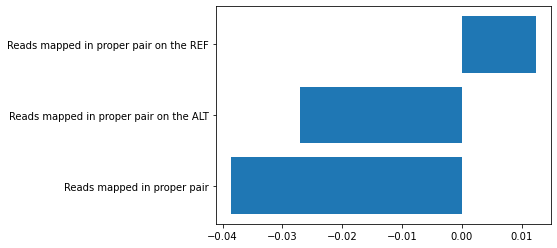

In [36]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [37]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.49761788674514174


## Random Forest

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [23]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [24]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[96 50 31  0]
 [56 24 32  0]
 [45 19 14  0]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

           0       0.48      0.54      0.51       177
           1       0.26      0.21      0.23       112
           2       0.18      0.18      0.18        78
           3       0.00      0.00      0.00         1

    accuracy                           0.36       368
   macro avg       0.23      0.23      0.23       368
weighted avg       0.35      0.36      0.36       368

0.3641304347826087


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.39689117968006316


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [ ]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [ ]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

In [ ]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

### Using rbf (with non-linear boundary) as kernel

In [ ]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

## DNN - Deep Neural Network

In [ ]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

In [ ]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "0/1", "1/1", "./."])
df_GIAB_2_y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(10, activation='relu', name='layer_3')) # tahn
    model.add(Dense(4, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

In [ ]:
history = estimator.fit(X_train, y_train)

In [ ]:
history.history["accuracy"]

In [ ]:
history.history["loss"]

In [ ]:
estimator.predict(X_test)

In [ ]:
y_test

In [ ]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

In [ ]:
y_test = y_test2["genotype"].to_numpy()

In [ ]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

In [ ]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [ ]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
model().fit(X_train, y_train, epochs=200)

In [ ]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 